# Welcome to PyCon Africa 2019 Pandas Tutorial

In this hands on workshop we shall explore pupil result for Primary Leaving Examination(PLE) for the years 2010-2016.

With this dataset, we shall attempt to learn a few things about Uganda Primary Education while also learning some Pandas tricks as bonus.

By **Kenneth Matovu** *SSE Andela Uganda*

## Let's Get started

* Glance at the Data
* Clean the Data
* Let's get the pandas on

### 1. What were the best districts for each year?

### 2. What districts have registered a decline in D1 performance in 2016?

### 3. Bar graph showing a distribution of pupils who fail over the years by gender

### 4. Boys vs Girls

In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot

In [3]:
import matplotlib

In [4]:
%matplotlib inline

In [5]:
df = pd.read_csv('ple-results-by-district-2010-2016.csv')

In [6]:
df.head(10)

,YEAR,DISTRICT,NUMBER OF SCHOOLS/UNEB CENTRE,TOTAL CANDIDATES,TOTAL DIV 1,% DIV 1,TOTAL DIV 2,% DIV 2,TOTAL DIV 3,% DIV 3,...,MALE TOTAL DIV2,MALE % DIV2,MALE TOTAL DIV3,MALE % DIV3,MALE TOTAL DIV4,MALE % DIV4,MALE TOTAL U,MALE % U,MALE TOTAL X,MALE % X
0,2010,ABIM,NaN,1075,25,2.3,587,54.6,231,21.5,...,365,60.4,111,18.4,55,9.1,25.0,4.1,28.0,4.6
1,2010,ADJUMANI,NaN,1807,56,3.1,598,33.1,511,28.3,...,424,37.1,321,28.1,225,19.7,103.0,9.0,32.0,2.8
2,2010,AGAGO,NaN,2774,114,4.1,1228,44.3,582,21.0,...,932,48.8,371,19.4,301,15.8,179.0,9.4,45.0,2.4
3,2010,ALEBTONG,NaN,2774,27,1.0,898,32.4,694,25.0,...,734,38.5,458,24.0,343,18.0,298.0,15.6,50.0,2.6
4,2010,AMOLATAR,NaN,2380,39,1.6,750,31.5,567,23.8,...,512,34.9,340,23.1,322,21.9,222.0,15.1,40.0,2.7
5,2010,AMUDAT,NaN,67,1,1.5,35,52.2,17,25.4,...,26,61.9,7,16.7,6,14.3,1.0,2.4,1.0,2.4
6,2010,AMURIA,NaN,3510,52,1.5,1679,47.8,1005,28.6,...,1115,54.0,514,24.9,281,13.6,77.0,3.7,37.0,1.8
7,2010,AMURU,NaN,2060,34,1.7,802,38.9,493,23.9,...,654,44.8,333,22.8,274,18.8,117.0,8.0,48.0,3.3
8,2010,APAC,NaN,4838,152,3.1,1986,41.1,1149,23.7,...,1310,45.9,593,20.8,467,16.4,315.0,11.0,56.0,2.0
9,2010,ARUA,NaN,8182,132,1.6,3869,47.3,2200,26.9,...,2674,54.1,1110,22.4,535,10.8,289.0,5.8,218.0,4.4


In [7]:
df.shape

(932, 42)

In [8]:
df.isna().sum()

YEAR                               0
DISTRICT                           0
NUMBER OF SCHOOLS/UNEB CENTRE    932
TOTAL CANDIDATES                   0
TOTAL DIV 1                        0
% DIV 1                            0
TOTAL DIV 2                        0
% DIV 2                            0
TOTAL DIV 3                        0
% DIV 3                            0
TOTAL DIV 4                        0
% DIV 4                            0
TOTAL U                            0
% U                                0
TOTAL X                            0
% X                                0
FEMALE CANDIDATES                  0
FEMALE TOTAL DIV1                 13
FEMALE % DIV1                      0
FEMALE TOTAL DIV2                  0
FEMALE % DIV2                      0
FEMALE TOTAL DIV3                  0
FEMALE % DIV3                      0
FEMALE TOTAL DIV4                  2
FEMALE % DIV4                      0
FEMALE TOTAL U                     4
FEMALE % U (%)                     0
F

In [10]:
df = df.drop(['NUMBER OF SCHOOLS/UNEB CENTRE'], axis=1)

In [11]:
df.columns

Index(['YEAR', 'DISTRICT ', 'TOTAL CANDIDATES', 'TOTAL DIV 1', '% DIV 1',
       'TOTAL DIV 2', '% DIV 2', 'TOTAL DIV 3', '% DIV 3', 'TOTAL DIV 4',
       '% DIV 4', 'TOTAL U', '% U', 'TOTAL X', '% X', 'FEMALE CANDIDATES',
       'FEMALE TOTAL DIV1 ', 'FEMALE % DIV1 ', 'FEMALE TOTAL DIV2',
       'FEMALE % DIV2', 'FEMALE TOTAL DIV3', 'FEMALE % DIV3',
       'FEMALE TOTAL DIV4', 'FEMALE % DIV4', 'FEMALE TOTAL U',
       'FEMALE % U (%)', 'FEMALE TOTAL X', 'FEMALE % X ', 'MALE CANDIDATES',
       'MALE TOTAL DIV1 ', 'MALE % DIV1 ', 'MALE TOTAL DIV2 ', 'MALE % DIV2',
       'MALE TOTAL DIV3', 'MALE % DIV3', 'MALE TOTAL DIV4', 'MALE % DIV4 ',
       'MALE TOTAL U', 'MALE % U ', 'MALE TOTAL X', 'MALE % X'],
      dtype='object')

In [14]:
df = df.rename(columns={'DISTRICT ': 'DISTRICT'})

In [16]:
df.sort_values('DISTRICT')

,YEAR,DISTRICT,TOTAL CANDIDATES,TOTAL DIV 1,% DIV 1,TOTAL DIV 2,% DIV 2,TOTAL DIV 3,% DIV 3,TOTAL DIV 4,...,MALE TOTAL DIV2,MALE % DIV2,MALE TOTAL DIV3,MALE % DIV3,MALE TOTAL DIV4,MALE % DIV4,MALE TOTAL U,MALE % U,MALE TOTAL X,MALE % X
798,2016,ABIM,1231,119,9.7,660,53.6,250,20.3,120,...,367,53.7,127,18.6,59,8.6,24.0,3.5,14.0,2.3
665,2014,ABIM,1059,78,7.4,657,62.0,181,17.1,76,...,437,66.1,94,14.2,39,5.9,15.0,2.3,15.0,2.3
0,2010,ABIM,1075,25,2.3,587,54.6,231,21.5,126,...,365,60.4,111,18.4,55,9.1,25.0,4.1,28.0,4.6
266,2012,ABIM,1177,64,5.4,657,55.8,214,18.2,139,...,411,59.3,116,16.7,63,9.1,37.0,5.3,15.0,2.2
133,2011,ABIM,1092,44,4.0,609,55.8,209,19.1,120,...,387,61.8,101,16.1,53,8.5,34.0,5.4,13.0,2.1
399,2013,ABIM,1195,53,4.4,716,59.9,215,18.0,99,...,481,66.8,98,13.6,53,7.4,31.0,4.3,20.0,2.8
532,2015,ABIM,1104,65,5.9,576,52.2,297,26.9,96,...,389,58.6,158,23.8,52,7.8,15.0,2.3,12.0,1.8
799,2016,ADJUMANI,3347,174,5.2,1287,38.5,883,26.4,650,...,935,43.4,518,24.0,407,18.9,152.0,7.1,26.0,1.5
666,2014,ADJUMANI,2329,138,5.9,1054,45.3,646,27.7,322,...,688,46.8,380,25.9,214,14.6,67.0,4.6,24.0,1.6
400,2013,ADJUMANI,1774,89,5.0,847,47.7,502,28.3,210,...,568,51.0,297,26.7,129,11.6,47.0,4.2,13.0,1.2


In [21]:
best_districts = df.groupby('YEAR', group_keys=False).apply(pd.DataFrame.nlargest, n=1, columns='TOTAL DIV 1')

In [22]:
best_districts

,YEAR,DISTRICT,TOTAL CANDIDATES,TOTAL DIV 1,% DIV 1,TOTAL DIV 2,% DIV 2,TOTAL DIV 3,% DIV 3,TOTAL DIV 4,...,MALE TOTAL DIV2,MALE % DIV2,MALE TOTAL DIV3,MALE % DIV3,MALE TOTAL DIV4,MALE % DIV4,MALE TOTAL U,MALE % U,MALE TOTAL X,MALE % X
52,2010,KAMPALA,25509,7105,27.9,13737,53.9,2370,9.3,1027,...,6168,51.5,897,7.5,409,3.4,388.0,3.2,236.0,2.0
185,2011,KAMPALA,26104,7851,30.1,13291,50.9,2299,8.8,1372,...,5920,48.0,1010,8.2,498,4.0,428.0,3.5,206.0,1.7
318,2012,KAMPALA,27070,8713,32.2,13688,50.6,2137,7.9,1286,...,6060,47.0,922,7.2,480,3.7,353.0,2.7,233.0,1.8
451,2013,KAMPALA,26711,7345,27.5,14457,54.1,2384,8.9,1203,...,6468,51.8,965,7.7,426,3.4,369.0,3.0,220.0,1.8
795,2014,WAKISO,38289,8268,21.6,19352,50.5,4911,12.8,2782,...,8950,50.4,2028,11.4,1018,5.7,936.0,5.3,384.0,2.2
662,2015,WAKISO,38338,7680,20.0,18148,47.3,5552,14.5,3566,...,8067,46.6,2296,13.3,1396,8.1,1103.0,6.4,428.0,2.5
929,2016,WAKISO,42569,8910,20.9,20076,47.2,5788,13.6,4481,...,9005,46.0,2446,12.5,1793,9.2,1183.0,6.0,335.0,1.8


In [23]:
best_years = df.groupby('DISTRICT', group_keys=False).apply(pd.DataFrame.nlargest, n=1, columns='TOTAL DIV 1')

In [24]:
best_years.head(20)

,YEAR,DISTRICT,TOTAL CANDIDATES,TOTAL DIV 1,% DIV 1,TOTAL DIV 2,% DIV 2,TOTAL DIV 3,% DIV 3,TOTAL DIV 4,...,MALE TOTAL DIV2,MALE % DIV2,MALE TOTAL DIV3,MALE % DIV3,MALE TOTAL DIV4,MALE % DIV4,MALE TOTAL U,MALE % U,MALE TOTAL X,MALE % X
798,2016,ABIM,1231,119,9.7,660,53.6,250,20.3,120,...,367,53.7,127,18.6,59,8.6,24.0,3.5,14.0,2.3
532,2015,ABIM,1104,65,5.9,576,52.2,297,26.9,96,...,389,58.6,158,23.8,52,7.8,15.0,2.3,12.0,1.8
799,2016,ADJUMANI,3347,174,5.2,1287,38.5,883,26.4,650,...,935,43.4,518,24.0,407,18.9,152.0,7.1,26.0,1.5
533,2015,ADJUMANI,2407,110,4.6,838,34.8,820,34.1,367,...,589,38.5,519,33.9,212,13.9,117.0,7.6,20.0,1.3
667,2014,AGAGO,3935,105,2.7,1645,41.8,896,22.8,809,...,1200,47.6,541,21.4,501,19.9,144.0,5.7,50.0,2.0
135,2011,AGAGO,3281,140,4.3,1559,47.5,757,23.1,384,...,1176,52.8,488,21.9,231,10.4,195.0,8.7,36.0,1.6
801,2016,ALEBTONG,4016,97,2.4,1196,29.8,960,23.9,841,...,810,34.0,536,22.5,524,22.0,409.0,17.2,26.0,1.4
535,2015,ALEBTONG,3449,43,1.2,1076,31.2,1117,32.4,550,...,742,36.1,630,30.6,314,15.3,293.0,14.2,44.0,2.1
802,2016,AMOLATAR,2705,77,2.8,852,31.5,621,23.0,530,...,549,36.4,333,22.1,299,19.8,224.0,14.8,46.0,3.3
536,2015,AMOLATAR,2530,72,2.8,727,28.7,706,27.9,427,...,455,31.9,405,28.4,234,16.4,241.0,16.9,34.0,2.4


In [25]:
df['DISTRICT'] = df['DISTRICT'].str.strip()

In [26]:
best_years = df.groupby('DISTRICT', group_keys=False).apply(pd.DataFrame.nlargest, n=1, columns='TOTAL DIV 1')

In [27]:
best_years.head(20)

,YEAR,DISTRICT,TOTAL CANDIDATES,TOTAL DIV 1,% DIV 1,TOTAL DIV 2,% DIV 2,TOTAL DIV 3,% DIV 3,TOTAL DIV 4,...,MALE TOTAL DIV2,MALE % DIV2,MALE TOTAL DIV3,MALE % DIV3,MALE TOTAL DIV4,MALE % DIV4,MALE TOTAL U,MALE % U,MALE TOTAL X,MALE % X
798,2016,ABIM,1231,119,9.7,660,53.6,250,20.3,120,...,367,53.7,127,18.6,59,8.6,24.0,3.5,14.0,2.3
799,2016,ADJUMANI,3347,174,5.2,1287,38.5,883,26.4,650,...,935,43.4,518,24.0,407,18.9,152.0,7.1,26.0,1.5
135,2011,AGAGO,3281,140,4.3,1559,47.5,757,23.1,384,...,1176,52.8,488,21.9,231,10.4,195.0,8.7,36.0,1.6
801,2016,ALEBTONG,4016,97,2.4,1196,29.8,960,23.9,841,...,810,34.0,536,22.5,524,22.0,409.0,17.2,26.0,1.4
802,2016,AMOLATAR,2705,77,2.8,852,31.5,621,23.0,530,...,549,36.4,333,22.1,299,19.8,224.0,14.8,46.0,3.3
138,2011,AMUDAT,191,7,3.7,74,38.7,44,23.0,28,...,46,39.7,25,21.6,17,14.7,10.0,8.6,11.0,9.5
139,2011,AMURIA,3497,116,3.3,1688,48.3,967,27.7,444,...,1047,51.8,534,26.4,232,11.5,95.0,4.7,36.0,1.8
672,2014,AMURU,2749,80,2.9,1178,42.9,612,22.3,505,...,942,48.6,384,19.8,340,17.5,155.0,8.0,41.0,2.1
673,2014,APAC,5164,244,4.7,2144,41.5,1205,23.3,781,...,1335,45.8,619,21.2,434,14.9,293.0,10.0,55.0,1.9
275,2012,ARUA,8031,176,2.2,3794,47.2,1978,24.6,1096,...,2580,51.6,1114,22.3,603,12.1,345.0,6.9,210.0,4.2


In [28]:
declined_districts = best_districts.query('YEAR != 2016')

In [29]:
declined_districts.head(20)

,YEAR,DISTRICT,TOTAL CANDIDATES,TOTAL DIV 1,% DIV 1,TOTAL DIV 2,% DIV 2,TOTAL DIV 3,% DIV 3,TOTAL DIV 4,...,MALE TOTAL DIV2,MALE % DIV2,MALE TOTAL DIV3,MALE % DIV3,MALE TOTAL DIV4,MALE % DIV4,MALE TOTAL U,MALE % U,MALE TOTAL X,MALE % X
52,2010,KAMPALA,25509,7105,27.9,13737,53.9,2370,9.3,1027,...,6168,51.5,897,7.5,409,3.4,388.0,3.2,236.0,2.0
185,2011,KAMPALA,26104,7851,30.1,13291,50.9,2299,8.8,1372,...,5920,48.0,1010,8.2,498,4.0,428.0,3.5,206.0,1.7
318,2012,KAMPALA,27070,8713,32.2,13688,50.6,2137,7.9,1286,...,6060,47.0,922,7.2,480,3.7,353.0,2.7,233.0,1.8
451,2013,KAMPALA,26711,7345,27.5,14457,54.1,2384,8.9,1203,...,6468,51.8,965,7.7,426,3.4,369.0,3.0,220.0,1.8
795,2014,WAKISO,38289,8268,21.6,19352,50.5,4911,12.8,2782,...,8950,50.4,2028,11.4,1018,5.7,936.0,5.3,384.0,2.2
662,2015,WAKISO,38338,7680,20.0,18148,47.3,5552,14.5,3566,...,8067,46.6,2296,13.3,1396,8.1,1103.0,6.4,428.0,2.5


In [41]:
fail_by_gender_by_year = df.groupby('YEAR',group_keys=False).agg({'FEMALE TOTAL DIV4':'sum', 'MALE TOTAL DIV4':'sum'})

In [47]:
fail_by_gender_by_year = fail_by_gender_by_year.reset_index()

In [48]:
fail_by_gender_by_year.shape

(7, 4)

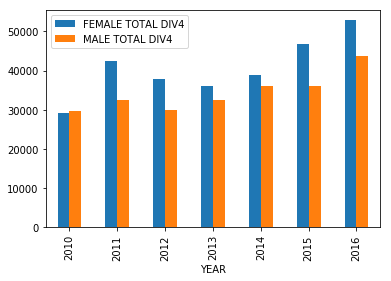

In [49]:
fail_by_gender_by_year.plot(x='YEAR', y=['FEMALE TOTAL DIV4', 'MALE TOTAL DIV4'], kind='bar')